In [13]:
import matplotlib.pyplot as plt
import numpy as np
import time

ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
# Code to run all the algorithms at the same time
# Aho-Corasick algorithm for string matching: https://www.codespeedy.com/explain-the-aho-corasick-algorithm-for-pattern-searching-in-python/

class Ahomain:
    def __init__(self):
        self.go = {}
        self.out = []
        self.breaks = None


def aho_treeform(list1):
    main = Ahomain()

    for way in list1:
        point = main
        for sym in way:
            point = point.go.setdefault(sym, Ahomain())
        point.out.append(way)
    return main


def aho_state_transition(list1):
    main = aho_treeform(list1)
    queue = []
    for point in main.go.values():
        queue.append(point)
        point.breaks = main

    while len(queue) > 0:
        rightpoint = queue.pop(0)
        for clue, uniquepoint in rightpoint.go.items():
            queue.append(uniquepoint)
            firstpoint = rightpoint.breaks
            while firstpoint != None and not clue in firstpoint.go:
                firstpoint = firstpoint.breaks
            uniquepoint.breaks = firstpoint.go[clue] if firstpoint else main
            uniquepoint.out += uniquepoint.breaks.out

    return main


def aho_search(y, main, call):
    point = main
    for i in range(len(y)):
        while point != None and not y[i] in point.go:
            point = point.breaks
        if point == None:
            point = main
            continue
        point = point.go[y[i]]
        for design in point.out:
            call(i - len(design) + 1, design)


def found(loc, list1):
    print("Pattern found at index %s" % (loc))


# Rabin Karp Code:
def search(pat, txt, q):
    starting_indexes = []
    M = len(pat)
    N = len(txt)
    i = 0
    j = 0
    p = 0
    t = 0
    h = 1
    for i in range(M - 1):
        h = (h * d) % q

    for i in range(M):
        p = (d * p + ord(pat[i])) % q
        t = (d * t + ord(txt[i])) % q

    for i in range(N - M + 1):
        if p == t:
            for j in range(M):
                if txt[i + j] != pat[j]:
                    break
            j += 1
            if j == M:
                starting_indexes.append(str(i))
        if i < N - M:
            t = (d * (t - ord(txt[i]) * h) + ord(txt[i + M])) % q
            if t < 0:
                t = t + q
    return starting_indexes


# Knutch Morris Pratt
# Python program for KMP Algorithm: https://www.geeksforgeeks.org/kmp-algorithm-for-pattern-searching/
def KMPSearch(pat, txt):
    M = len(pat)
    N = len(txt)
    lps = [0] * M
    j = 0
    computeLPSArray(pat, M, lps)
    i = 0
    while i < N:
        if pat[j] == txt[i]:
            i += 1
            j += 1
        if j == M:
            print("Pattern found at index " + str(i - j))
            j = lps[j - 1]
        elif i < N and pat[j] != txt[i]:
            if j != 0:
                j = lps[j - 1]
            else:
                i += 1


def computeLPSArray(pat, M, lps):
    len = 0
    lps[0]
    i = 1
    while i < M:
        if pat[i] == pat[len]:
            len += 1
            lps[i] = len
            i += 1
        else:
            if len != 0:
                len = lps[len - 1]
            else:
                lps[i] = 0
                i += 1


# Bad Character Heuristic Boyer Moore String Matching Algorithm

NO_OF_CHARS = 256


def badCharHeuristic(string, size):
    badChar = [-1] * NO_OF_CHARS
    for i in range(size):
        badChar[ord(string[i])] = i
    return badChar


def BMsearch(txt, pat):
    m = len(pat)
    n = len(txt)
    badChar = badCharHeuristic(pat, m)
    s = 0
    while s <= n - m:
        j = m - 1
        while j >= 0 and pat[j] == txt[s + j]:
            j -= 1
        if j < 0:
            print("Pattern found at index = {}".format(s))
            s += m - badChar[ord(txt[s + m])] if s + m < n else 1
        else:
            s += max(1, j - badChar[ord(txt[s + j])])


# Boyer Moore Algorithm with Good Suffix heuristic


def preprocess_strong_suffix(shift, bpos, pat, m):
    i = m
    j = m + 1
    bpos[i] = j
    while i > 0:
        while j <= m and pat[i - 1] != pat[j - 1]:
            if shift[j] == 0:
                shift[j] = j - i
            j = bpos[j]
        i -= 1
        j -= 1
        bpos[i] = j


def preprocess_case2(shift, bpos, pat, m):
    j = bpos[0]
    for i in range(m + 1):
        if shift[i] == 0:
            shift[i] = j
        if i == j:
            j = bpos[j]


def BMGoodsearch(text, pat):
    s = 0
    m = len(pat)
    n = len(text)
    bpos = [0] * (m + 1)
    shift = [0] * (m + 1)
    preprocess_strong_suffix(shift, bpos, pat, m)
    preprocess_case2(shift, bpos, pat, m)
    while s <= n - m:
        j = m - 1
        while j >= 0 and pat[j] == text[s + j]:
            j -= 1
        if j < 0:
            print("Pattern found at index = %d" % s)
            s += shift[0]
        else:
            s += shift[j + 1]


# Brute force search
def brute_force_search(pat, txt):
    M = len(pat)
    N = len(txt)
    for i in range(N - M + 1):
        j = 0
        while j < M:
            if txt[i + j] != pat[j]:
                break
            j += 1
        if j == M:
            print("Pattern found at index ", i)


def RunAllAlgorithms(text, pattern):
    Times = []
    # Aho-Corasick algorithm
    print("Initiating Aho-Corasick algorithm")
    start_time = time.time()
    list1 = [pattern]
    main = aho_state_transition(list1)
    aho_search(text, main, found)
    execution_time = time.time() - start_time
    print(" time = ", execution_time)
    Times.append(execution_time)
    f.close()

    # Rabin-Karp algorithm
    print("Initiating Rabin-Karp algorithm")
    starting_time = time.time()
    q = 101
    result = search(pattern, text, q)
    ending_time = time.time() - starting_time
    print(result, " time = ", ending_time)
    Times.append(ending_time)

    # Knutch Morris Pratt algorithm
    print("Initiating Knutch Morris Pratt algorithm")
    start_time = time.time()
    KMPSearch(pattern, text)
    ending_time = time.time() - start_time
    print(" time = ", ending_time)
    Times.append(ending_time)

    # Bayer Moore Bad Character heuristic algorithm
    print("Initiating Bayer Moore Bad Character Heuristic algorithm")
    start_time = time.time()
    BMsearch(text, pattern)
    ending_time = time.time() - start_time
    print(" time = ", ending_time)
    Times.append(ending_time)

    # Boyer Moore Good Suffix heuristic algorithm
    print("Initiating Bayer Moore Good Suffix Heuristic algorithm")
    start_time = time.time()
    print(BMGoodsearch(text, pattern))
    ending_time = time.time() - start_time
    print(" time = ", ending_time)
    Times.append(ending_time)

    # Brute Force Search
    print("Initiating Brute Force Search algorithm")
    start_time = time.time()
    brute_force_search(pattern, text)
    ending_time = time.time() - start_time
    print(" time = ", ending_time)
    Times.append(ending_time)
    return Times


def CalculateD(text):
    List = []
    for i in text:
        if i not in file:
            List.append(i)
    return len(List)

In [ ]:
def plotfn(time, text_len, alg_name, title):
    for k in range(0, len(time)):
        plt.plot(text_len, time[k])
    plt.legend(alg_name)
    plt.ylabel("Time(s)")
    plt.xlabel("Text Length(#character)")
    plt.title(title)
    plt.savefig(title+".png")

In [14]:
# Here you run the algorithm after changing file and pattern if necessary
file = "chimpanzee.txt"
# pattern = "GCATACGC"
f = open(file, "r")
text = f.read()
# d = CalculateD(text)
# Times = RunAllAlgorithms(text, pattern)

# brute-force break (searches for a single character that appears frequently), takes roughly 11 minutes
pattern = "A"
brute_force_search(pattern, text)




NameError: name 'brute_force_search' is not defined

In [ ]:
#Test all algorithms with different text length
text_len = [100,1000,10000, 100000, 1000000, 10000000]
alg_name = ["Aho", "RK","KMP", "BMBCH","GMGSH", "BF"]

Time = []
for i in text_len:
    text_temp = text[:i]
    d = CalculateD(text_temp)
    print("----------------------------------------------------")
    print("Running all algorithms with text of length", str(i))
    # Times is a list containing the time of execution of all 6 algorithms (list of 6 elements)
    Time.append(RunAllAlgorithms(text_temp, pattern))

----------------------------------------------------
Running all algorithms with text of length 100
Initiating Aho-Corasick algorithm
 time =  0.0
Initiating Rabin-Karp algorithm
[]  time =  0.0
Initiating Knutch Morris Pratt algorithm
 time =  0.0
Initiating Bayer Moore Bad Character Heuristic algorithm
 time =  0.0
Initiating Bayer Moore Good Suffix Heuristic algorithm
None
 time =  0.0
Initiating Brute Force Search algorithm
 time =  0.0
----------------------------------------------------
Running all algorithms with text of length 1000
Initiating Aho-Corasick algorithm
 time =  0.0
Initiating Rabin-Karp algorithm
[]  time =  0.0010144710540771484
Initiating Knutch Morris Pratt algorithm
 time =  0.0
Initiating Bayer Moore Bad Character Heuristic algorithm
 time =  0.0
Initiating Bayer Moore Good Suffix Heuristic algorithm
None
 time =  0.0
Initiating Brute Force Search algorithm
 time =  0.0
----------------------------------------------------
Running all algorithms with text of le

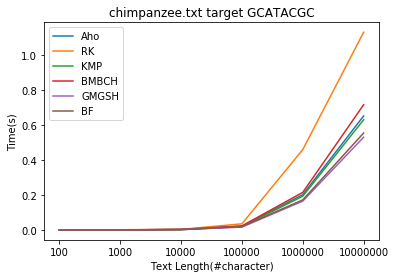

In [ ]:
#Plot
Time_np = np.array(Time).T
title = file + " target " + pattern
plotfn(Time_np, list(map(str, text_len)),alg_name, title)